# PG/HOSTEL RECOMMENDATION

## 1. IMPORT NECESSARY LIBRARIES AND DATA:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#we need to read "Nil","NA","none","None","Na" in data as null value
data = pd.read_csv("C:\\Users\\hp\Downloads\\PG RECOMMENDATION SYSTEM (Responses) - Form responses 1 (4).csv", na_values = ["Nil","NA","none","None","Na"])
data.head()

,Timestamp,Name (Optional),Age,Gender,Place hailing from,Name of the Hostel,Category,Type,Distance from College:,Location,...,Appliances available,Appliances allowed,Rate the atmosphere around the hostel:,"On a scale of 1 to 5, how strict is the hostel/PG","On a scale of 1 to 5, how do you rate the food quality","On a scale of 1 to 5, how do you rate the hostel cleanliness","On a scale of 1 to 5, select the overall rating",Comments/Remarks/Suggestions related to hostel/PG,Does the hostel/PG provide laundry facilities?,Is the room well ventilated
0,01-04-2023 22:25,Shebin,21,Male,Kerala,KE Hall,Boys,Hostels run by Christian missionaries,Less than 500 ms,CHRIST UNIVERSITY,...,"Washing machine, Water heater","Iron box, Kettle, Air frier, Induction Cooktop",4,4,3.0,5,5,Library access is very convenient.,Yes,Yes
1,01-04-2023 22:26,Arya,22,Female,Kerala,Augustine Nivas,Girls,Hostels run by Christian missionaries,500 ms to 1 km,Kaveri Layout,...,"Washing machine, Water heater","Iron box, Kettle, Air frier, Hair drier/Straig...",5,3,3.0,4,4,NaN,No,Yes
2,01-04-2023 22:26,Anandhalakshmi,22,Female,Kerala,Augustine Nivas,Girls,Hostels run by Christian missionaries,500 ms to 1 km,Kaveri layout,...,"Washing machine, Water heater","Iron box, Kettle, Air frier, Hair drier/Straig...",5,3,3.0,4,4,NaN,No,Yes
3,01-04-2023 22:53,Nidin,21,Male,Tamil Nadu,KE Hall,Boys,Normal Hostels,Less than 500 ms,Inside Christ University,...,"Washing machine, Induction cooktop, Water heater","Iron box, Kettle",4,4,3.0,4,4,NaN,Yes,Yes
4,01-04-2023 23:05,Rishav Laloo,23,Male,Meghalaya,KE Hall,Boys,Hostels run by Christian missionaries,Less than 500 ms,Christ University,...,"Washing machine, Induction cooktop, Water heater","Iron box, Kettle",3,5,NaN,5,4,NaN,Yes,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Timestamp                                                     200 non-null    object 
 1   Name (Optional)                                               119 non-null    object 
 2   Age                                                           200 non-null    int64  
 3   Gender                                                        200 non-null    object 
 4   Place hailing from                                            200 non-null    object 
 5   Name of the Hostel                                            199 non-null    object 
 6   Category                                                      200 non-null    object 
 7   Type                                                          200 non-n

## DATA PRE-PROCESSING:

##### 1. DELETING UNNECESSARY COLUMNS.

In [4]:
data1 = data.drop(['Timestamp','Name (Optional)'], axis=1)

##### 2. REMOVING NULL VALUES:

In [5]:
data1['On a scale of 1 to 5, how do you rate the food quality'].fillna(0, inplace = True)
data1['Comments/Remarks/Suggestions related to hostel/PG'].fillna("Not Available", inplace = True)
data1['Food type:'].fillna("Not Available", inplace = True)
data1['If yes, what type of food do they provide?'].fillna("Not Available", inplace = True)
data1['Name of the Hostel'].fillna("Not Available", inplace = True)

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Age                                                           200 non-null    int64  
 1   Gender                                                        200 non-null    object 
 2   Place hailing from                                            200 non-null    object 
 3   Name of the Hostel                                            200 non-null    object 
 4   Category                                                      200 non-null    object 
 5   Type                                                          200 non-null    object 
 6   Distance from College:                                        200 non-null    object 
 7   Location                                                      200 non-n

##### 3. CONVERTING OBJECT TYPE TO STRING:

In [7]:
# TO CONVERT COLUMNS WITH OBJECT DATATYPE TO STRING DATA TYPE
stringcols = data1.select_dtypes(include='object').columns
data1[stringcols] = data1[stringcols].fillna('').astype(str)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Age                                                           200 non-null    int64  
 1   Gender                                                        200 non-null    object 
 2   Place hailing from                                            200 non-null    object 
 3   Name of the Hostel                                            200 non-null    object 
 4   Category                                                      200 non-null    object 
 5   Type                                                          200 non-null    object 
 6   Distance from College:                                        200 non-null    object 
 7   Location                                                      200 non-n

##### 4. REMOVE TRAILING WHITESPACES FROM NAME OF THE HOSTELS COLUMN:

In [8]:
# REMOVING TRAILING WHITE SPACES FROM ALL HOSTEL/PG NAMES:

data1['Name of the Hostel'] = data1['Name of the Hostel'].apply(str.rstrip)

##### 5. CONVERTING ALL HOSTEL NAMES TO LOWER CASE:

In [9]:
data1['Name of the Hostel'] = data1['Name of the Hostel'].str.lower()

##### 6. FINDING THE NUMBER OF HOSTELS WHOSE DATA WE HAVE COLLECTED.

In [10]:
data1["Name of the Hostel"].nunique()

93

##### 7.FINDING UNIQUE HOSTELS

In [11]:
#data['column'] = df['column'].astype('str') 
data1['Name of the Hostel'].unique()

array(['ke hall', 'augustine nivas', 'stanza living',
       'gayathri luxury pg', 'providence convent', 'besania study house',
       'jonas hall', 'not available', 'pelagia hostel',
       'sri sai pg for ladies', 'malabar plaza', 'savina bhavan',
       'young india pg', 'ankalamma pg for ladies', 'vijalakshmi',
       'joseph pg for ladies', 'lakshmi venkateshwara pg', 'joseph’s pg',
       'aishwarya sunshine pg', 'sri omkareshwara pg',
       'sri lakshmi venkateshwara pg for girls', 'happy homes hostel',
       'vaibhava pg', 'caritas study house', 'sannidhana', 'slv pg',
       'shree hostel', 'sapthagiri', 'venkateshwara pg', 'serenity',
       'besania hostel', 'new sri krishna krupa pg',
       'providence covent hostel', 'cst vidhya bhavan', 'snehadan',
       'aishwarya pg', 'yuva vikas hostel', 'adler',
       'providence convent hostel', 'comfort luxury', 'yuvi',
       'prashanti study house', 'svr pg for ladies', 'ankalamma',
       'puzzles living', 'slv ladies pg', '

7.since some of them are just the same hostels but written in different formats, convert into a single name.

In [12]:
data1['Name of the Hostel'] = data1['Name of the Hostel'].replace('', 'not given')
data1['Name of the Hostel'] = data1['Name of the Hostel'].replace('joseph’s pg', 'joseph pg for ladies')
data1['Name of the Hostel'] = data1['Name of the Hostel'].replace('sri lakshmi venkateshwara pg', 'sri lakshmi venkateshwara pg for girls')
data1['Name of the Hostel'] = data1['Name of the Hostel'].replace('lakshmi venkateshwara pg', 'sri lakshmi venkateshwara pg for girls')
data1['Name of the Hostel'] = data1['Name of the Hostel'].replace('sri lakshmi venkateshwara', 'sri lakshmi venkateshwara pg for girls')
data1['Name of the Hostel'] = data1['Name of the Hostel'].replace('besania hostel', 'besania study house')
data1['Name of the Hostel'] = data1['Name of the Hostel'].replace('providence covent hostel', 'providence convent')
data1['Name of the Hostel'] = data1['Name of the Hostel'].replace('ankalamma', 'ankalamma pg for ladies')
data1['Name of the Hostel'] = data1['Name of the Hostel'].replace('slv pg', 'slv ladies pg')
data1['Name of the Hostel'] = data1['Name of the Hostel'].replace('agustine nivas', 'augustine nivas')
data1['Name of the Hostel'] = data1['Name of the Hostel'].replace('yashmitha', 'yashmitha pg')
data1['Name of the Hostel'] = data1['Name of the Hostel'].replace(['sannidhana', 'sannidhana girls hostel', 'sannidhana study house sabs'], 'sannidhana study house')
data1['Name of the Hostel'] = data1['Name of the Hostel'].replace('zolo maple', 'zolo mapple')
data1['Name of the Hostel'] = data1['Name of the Hostel'].replace('stanza living frankfurt', 'stanza living frankfurt house')




data1['Name of the Hostel'].unique()

array(['ke hall', 'augustine nivas', 'stanza living',
       'gayathri luxury pg', 'providence convent', 'besania study house',
       'jonas hall', 'not available', 'pelagia hostel',
       'sri sai pg for ladies', 'malabar plaza', 'savina bhavan',
       'young india pg', 'ankalamma pg for ladies', 'vijalakshmi',
       'joseph pg for ladies', 'sri lakshmi venkateshwara pg for girls',
       'aishwarya sunshine pg', 'sri omkareshwara pg',
       'happy homes hostel', 'vaibhava pg', 'caritas study house',
       'sannidhana study house', 'slv ladies pg', 'shree hostel',
       'sapthagiri', 'venkateshwara pg', 'serenity',
       'new sri krishna krupa pg', 'cst vidhya bhavan', 'snehadan',
       'aishwarya pg', 'yuva vikas hostel', 'adler',
       'providence convent hostel', 'comfort luxury', 'yuvi',
       'prashanti study house', 'svr pg for ladies', 'puzzles living',
       'myroomie camellia', 'svr pg', 'puzzles hope house',
       'presidency hostels', 'sri pmr pg', 'yashmitha p

In [13]:
data1["Name of the Hostel"].nunique()

78

##### 8. ROOM TYPE:

In [14]:
data1['Room Type:'] = data1['Room Type:'].replace(['2/4/6 Sharing', 'Two sharing special room daaaa!!!!', 'All', "Single, two sharing and 3 sharing "], 'Two-Sharing')
data1['Room Type:'] = data1['Room Type:'].replace(['Single '], 'Single')

In [15]:
data1['Room Type:'].unique()

array(['Three-Sharing', 'Two-Sharing', 'Four-Sharing', 'Single'],
      dtype=object)

In total we have details of 78 hostels

##### 9. DATATYPE OF FEES_PER_MONTH COLUMN:

In [16]:
#CONVERTING TO FLOAT TYPE:

data1['Fees per month']

0       4,500
1      11,500
2        8000
3       4,500
4        5000
        ...  
195      9000
196     16000
197      6000
198      6800
199      6800
Name: Fees per month, Length: 200, dtype: object

In [17]:
# SOME HAVE COMMAS AND SOME DOESN'T SO CONVERTING THE FEES COLUMN TO FLOAT VALUES.

data1['int_fees per month'] = data1['Fees per month'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
data1['int_fees per month']
data1.drop(['Fees per month'], axis = 1, inplace = True)

##### 10. CREATING A COLUMN CALLED FEES RANGE FOR RECOMMENDATION

In [18]:
conditions = [
    (data1['int_fees per month'] <= 5000),
    (data1['int_fees per month'] > 5000) & (data1['int_fees per month'] <= 8000),
    (data1['int_fees per month'] > 8000) & (data1['int_fees per month'] <= 12000),
    (data1['int_fees per month'] > 12000)
    ]

In [19]:
values = ["LESS THAN 5000", "BETWEEN 5000 AND 8000", "BETWEEN 8000 AND 12000", "MORE THAN 12000"]

In [20]:
data1['FEES_RANGE'] = np.select(conditions, values)

In [21]:
data1['FEES_RANGE'].unique()

array(['LESS THAN 5000', 'BETWEEN 8000 AND 12000',
       'BETWEEN 5000 AND 8000', 'MORE THAN 12000'], dtype=object)

##### 11. FINDING MEAN RATING FOR EACH HOSTEL AND REPLACING IT WITH OVERALL RATING:

In [22]:
hostels = list(data1['Name of the Hostel'].unique())
data1['Mean Rating'] = 0

for i in range(len(hostels)):
    data1['Mean Rating'][data1['Name of the Hostel'] == hostels[i]] = data1['On a scale of 1 to 5, select the overall rating'][data1['Name of the Hostel'] == hostels[i]].mean()

In [23]:
hostels = list(data1['Name of the Hostel'].unique())
data1['Mean Rating Cleanliness'] = 0

for i in range(len(hostels)):
    data1['Mean Rating Cleanliness'][data1['Name of the Hostel'] == hostels[i]] = data1['On a scale of 1 to 5, how do you rate the hostel cleanliness'][data1['Name of the Hostel'] == hostels[i]].mean()

In [24]:
hostels = list(data1['Name of the Hostel'].unique())
data1['Mean Rating Strictness'] = 0

for i in range(len(hostels)):
    data1['Mean Rating Strictness'][data1['Name of the Hostel'] == hostels[i]] = data1['On a scale of 1 to 5, how strict is the hostel/PG'][data1['Name of the Hostel'] == hostels[i]].mean()

## EDA AND VISUALIZATION:

1. DISTRIBUTION OF FEES PER MONTH:

<AxesSubplot:xlabel='int_fees per month', ylabel='Count'>

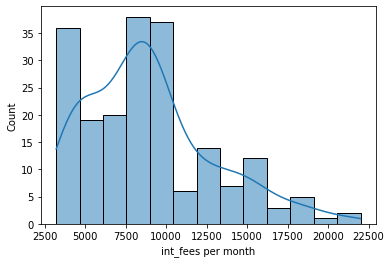

In [27]:
sns.histplot(data = data1, x = "int_fees per month", kde = True)

Common fee range is between 7,500 and 10,000

## MODELING : CONTENT BASED FILTERING

### 1. RECOMMENDING BASED ON USER'S  REQUIREMENT:

##### 1.1 USING COSINE-SIMILARITY:

In [25]:
import nltk
nltk.download('wordnet')
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from ast import literal_eval

import nltk
nltk.download('punkt')
nltk.download('stopwords')

nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
new_data1 = data1[['Name of the Hostel', 'Category', 'Type', 'Distance from College:', 'Does your PG/hostel provide mess facility?', 'int_fees per month','On a scale of 1 to 5, select the overall rating']]

### Creating a description column which contains the feactures of the each hostel. This is used to compare with user's requirements and provide corresponding recommendations

In [27]:
descriptions = data1['Category'] +' '+ data1['Type'] + ' ' + data1['Distance from College:'] + ' '+data1['FEES_RANGE'] + ' ' + data1['Room Type:']
#Printing the first description
descriptions[1]

'Girls Hostels run by Christian missionaries 500 ms to 1 km BETWEEN 8000 AND 12000 Two-Sharing'

In [28]:
data1['descriptions'] = descriptions

In [29]:
def requirementbased(distance,type,features):
    data1['Distance from College:']=data1['Distance from College:'].str.lower()
    data1['descriptions']=data1['descriptions'].str.lower()
    #data1['Category']=data1['Category'].str.lower()
    features=features.lower()
    features_tokens=word_tokenize(features)  
    sw = stopwords.words('english')
    lemm = WordNetLemmatizer()
    f1_set = {w for w in features_tokens if not w in sw}
    f_set=set()
    for se in f1_set:
        f_set.add(lemm.lemmatize(se))
    reqbased=data1[data1['Distance from College:']==distance.lower()]
    reqbased=reqbased[reqbased['Category']==type]
    reqbased=reqbased.set_index(np.arange(reqbased.shape[0]))
    l1 =[];l2 =[];cos=[];
  #print(reqbased['roomamenities'])
    for i in range(reqbased.shape[0]):
        temp_tokens=word_tokenize(reqbased['descriptions'][i])
        temp1_set={w for w in temp_tokens if not w in sw}
        temp_set=set()
        for se in temp1_set:
            temp_set.add(lemm.lemmatize(se))
        rvector = temp_set.intersection(f_set)
      #print(rvector)
        cos.append(len(rvector))
    reqbased['similarity']=cos
    reqbased=reqbased.sort_values(by='similarity',ascending=False)
    reqbased.drop_duplicates(subset='Name of the Hostel',keep='first',inplace=True)
    

    
    num_recommendations = reqbased.shape[0]
    num_all_items = data1.shape[0]
    coverage_score = num_recommendations / num_all_items
    
    
    print("THE COVERAGE SCORE: ", coverage_score)
    
    return reqbased[['Name of the Hostel','Category','Distance from College:', 'Room Type:', 'descriptions']]
   

In [30]:
req = requirementbased("Less than 500 ms", "Girls" ,'I need a Two-Sharing Girls PGs with a budget between 8000 and 12000')

THE COVERAGE SCORE:  0.165


In [31]:
req[['Name of the Hostel','Category','Distance from College:']].head()

,Name of the Hostel,Category,Distance from College:
48,aira girls pg,Girls,less than 500 ms
15,venkateshwara pg,Girls,less than 500 ms
36,sri pmr pg,Girls,less than 500 ms
38,v r hostels,Girls,less than 500 ms
42,sri pmr ladies pg,Girls,less than 500 ms


In [32]:
recommended_hostels = list(req['Name of the Hostel'])
recommended_hostels_desc = list(req['descriptions'])

In [33]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [34]:
num_recommendations = len(req)

#num_features = len(recommendations[0])
sum_similarities = 0

for i in range(num_recommendations):
    for j in range(i+1, num_recommendations):
        
        # tokenization
        X_list = word_tokenize(descriptions[i]) 
        Y_list = word_tokenize(descriptions[j])
  
        # sw contains the list of stopwords
        sw = stopwords.words('english') 
        l1 =[];l2 =[]
  
        # remove stop words from the string
        X_set = {w for w in X_list if not w in sw} 
        Y_set = {w for w in Y_list if not w in sw}
  
        # form a set containing keywords of both strings 
        rvector = X_set.union(Y_set) 
        for w in rvector:
            if w in X_set: l1.append(1) # create a vector
            else: l1.append(0)
            if w in Y_set: l2.append(1)
            else: l2.append(0)
        c = 0
        
  
            # cosine formula 
        for i in range(len(rvector)):
            c+= l1[i]*l2[i]
        cosine = c / float((sum(l1)*sum(l2))**0.5)
        sum_similarities += cosine
        
        
avg_similarity = sum_similarities / (num_recommendations * (num_recommendations - 1) / 2)
diversity = 1 - avg_similarity
print(diversity)

0.45186329721535556


## HYBRID : DEMOGRAPHICS + CONTENT BASED

This code is an example of a hybrid recommendation system because it combines two different recommendation approaches: demographic-based filtering and content-based filtering.

Demographic-based filtering is a technique that recommends items to users based on their demographic information, such as  gender, and place hailing from. In the code, we extract the demographic variables from the dataset and preprocess them.

Content-based filtering, on the other hand, recommends items to users based on the similarity of their attributes with the attributes of items they have previously liked. In the code, we extract the content-based variables (amenities and description) from the dataset, preprocess them, and calculate the pairwise cosine similarity between hostels based on these variables.

This means that the recommendations take into account both the demographic information of the user and the content-based similarity of the hostels.

By using a hybrid approach, we can potentially improve the accuracy of the recommendations by leveraging multiple sources of information.

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the hostel dataset
hostels = data1

# Define the user's demographic profile

gender = 'Female'
place = 'Kerala'

# Filter hostels based on demographic preferences
filtered_hostels = hostels[
                           (hostels['Gender'] == gender) &
                           (hostels['Place hailing from'] == place)]
# Extract the features from the hostel descriptions
vectorizer = CountVectorizer(stop_words='english')
features = vectorizer.fit_transform(filtered_hostels['descriptions']).toarray()

# Compute the cosine similarity between the features and the user's preferences
user_preferences = ["I need PGs with fees between 8000 and 12000"]
user_vector = vectorizer.transform(user_preferences).toarray()
similarities = cosine_similarity(features, user_vector)

# Rank the hostels based on similarity score
ranked_hostels = filtered_hostels.copy()
ranked_hostels['similarity'] = similarities[:, 0]
ranked_hostels.sort_values('similarity', ascending=False, inplace=True)

dataframe = pd.DataFrame(ranked_hostels)

# Print the top 5 recommended hostels
dataframe[['Name of the Hostel', 'int_fees per month', 'Distance from College:', 'Room Type:']].head(5)

,Name of the Hostel,int_fees per month,Distance from College:,Room Type:
171,aishwarya pg,10400,more than 1 km,Two-Sharing
185,blue bell's,10500,more than 1 km,Two-Sharing
177,aishwarya pg,10400,more than 1 km,Two-Sharing
54,new sri krishna krupa pg,10000,less than 500 ms,Two-Sharing
25,joseph pg for ladies,8500,less than 500 ms,Three-Sharing


In [38]:
num_recommendations = dataframe.shape[0]
num_all_items = data1.shape[0]
coverage_score = num_recommendations / num_all_items
    
    
print("THE COVERAGE SCORE: ", coverage_score)






num_recommendations = len(dataframe)

#num_features = len(recommendations[0])
sum_similarities = 0

descriptions = list(dataframe['descriptions'])

for i in range(num_recommendations):
    for j in range(i+1, num_recommendations):
        
        # tokenization
        X_list = word_tokenize(descriptions[i]) 
        Y_list = word_tokenize(descriptions[j])
  
        # sw contains the list of stopwords
        sw = stopwords.words('english') 
        l1 =[];l2 =[]
  
        # remove stop words from the string
        X_set = {w for w in X_list if not w in sw} 
        Y_set = {w for w in Y_list if not w in sw}
  
        # form a set containing keywords of both strings 
        rvector = X_set.union(Y_set) 
        for w in rvector:
            if w in X_set: l1.append(1) # create a vector
            else: l1.append(0)
            if w in Y_set: l2.append(1)
            else: l2.append(0)
        c = 0
        
  
            # cosine formula 
        for i in range(len(rvector)):
            c+= l1[i]*l2[i]
        cosine = c / float((sum(l1)*sum(l2))**0.5)
        sum_similarities += cosine
        
        
avg_similarity = sum_similarities / (num_recommendations * (num_recommendations - 1) / 2)
diversity = 1 - avg_similarity
print("DIVERSITY SCORE IS: ", diversity)

THE COVERAGE SCORE:  0.275
DIVERSITY SCORE IS:  0.48600428770400006


### 1.2 BY USING MEAN RATING

In [39]:
def descriptionbased(desc):
    desc = desc.lower()
    data1['Distance from College:']=data1['Distance from College:'].str.lower()
    data1['descriptions'] = data1['descriptions'].str.lower()
    descriptionbase=data1[data1['descriptions']== desc]
    descriptionbase=descriptionbase.sort_values(by='Mean Rating',ascending=False)
    descriptionbase.drop_duplicates(subset='Name of the Hostel',keep='first',inplace=True)
    if(descriptionbase.empty ==0):
        hname=descriptionbase[['Name of the Hostel','Mean Rating','Distance from College:', 'descriptions']]
        return hname.head()
    else:
        print('No Hostels Available')

In [40]:
print('Top hostels')
descriptionbased('Girls Hostels run by Christian missionaries 500 ms to 1 km BETWEEN 8000 AND 12000 Two-Sharing')

Top hostels


,Name of the Hostel,Mean Rating,Distance from College:,descriptions
1,augustine nivas,3.791667,500 ms to 1 km,girls hostels run by christian missionaries 50...
178,sannidhana study house,3.400000,500 ms to 1 km,girls hostels run by christian missionaries 50...


## 2. RECOMMENDING HOSTELS SIMILAR TO OTHER HOSTELS

In [41]:
# BASED ON DISTANCE:
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer(max_features = 5000, stop_words = 'english')
vectors = cvect.fit_transform(data1['Distance from College:']).toarray()

In [42]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)

In [43]:
def recommend(hostel):
    
    hostel_index = data1[data1['Name of the Hostel'] == hostel].index[0]
    distances = similarity[hostel_index]
    hostel_list = sorted(list(enumerate(distances)), reverse = True, key = lambda x:x[1])[1:6]
    for i in hostel_list:
        print(data1['Name of the Hostel'].iloc[i[0]])

In [44]:
recommend('augustine nivas')

augustine nivas
gayathri luxury pg
stanza living
sri sai pg for ladies
ankalamma pg for ladies


In [45]:
# BASED ON COMMENTS BY THE USERS FOR FEMALES:

data2 = (data['Comments/Remarks/Suggestions related to hostel/PG']).dropna()
data2 = data[data['Gender'] == "Female"]

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer(max_features = 5000, stop_words = 'english')
vectors = cvect.fit_transform(data2).toarray()

In [47]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)

In [48]:
def recommend(hostel):
    
    hostel_index = data1[data1['Name of the Hostel'] == hostel].index[0]
    distances = similarity[hostel_index]
    movies_list = sorted(list(enumerate(distances)), reverse = True, key = lambda x:x[1])[1:6]
    for i in movies_list:
        print(data2['Name of the Hostel'].iloc[i[0]])

In [49]:
recommend('augustine nivas')

Augustine Nivas
Stanza living
Gayathri Luxury pg 
Providence Convent 
Besania study house
